# Fluids week 4 
## Problem 5

In [1]:
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline
rc('figure',figsize=(12,5))

### Define finite difference functions

T is a vector of temperature in each space cell at a given time (shape (Nx,)).  
First and last elements are kept fixed at their given values, i.e. fixed boundary conditions.  
The returned vector excludes the boundaries.

In [2]:
def advect(T, v, dx, dt):
    # Leave both boundaries fixed
    return 0.5 * ( (T[:-2] + T[2:]) - v * dt / dx * (T[2:] - T[:-2]) )
def diffuse(T, D, dx, dt):
    # Leave both boundaries fixed
    return T[1:-1] + D * dt / dx**2 * (T[2:] - 2*T[1:-1] + T[0:-2])

### Stability conditions
$$ \frac{2 \Delta t D}{(\Delta x)^2} \lt 1 $$
$$ \frac{v \Delta t}{\Delta x} \lt 1 $$

In [104]:
# Parameters
v = 0.01  # velocity
D = 0.5  # diffusion coeff
dx = 1.  # space step
dt = 1.  # time step
print "Stability:"
print "Diffusion {}".format(np.abs(2*dt*D/(dx**2)) <= 1.0)
print "Advection {}".format(np.abs(v*dt/dx) <= 1.0)

Stability:
Diffusion True
Advection True


### Set up grid and initial conditions

In [100]:
# Grid size
Nt = 1000
Nx = 50
# Initial params
T_left = 1
T_right = 2

In [101]:
# Initialize grid
T = np.zeros( (Nt, Nx) )  # Each time interval is will be operated on twice
T[0,:-1] = T_left  # at t=0
T[:,0] = T_left
T[:,-1] = T_right  # all time

### Perform finite difference calculation

In [102]:
# Iterate over time steps
for t in range(1, Nt):
    # advection step
    T[t][1:-1] = advect(T[t-1], v, dx, dt)
    # diffusion step
    T[t][1:-1] = diffuse(T[t], D, dx, dt)

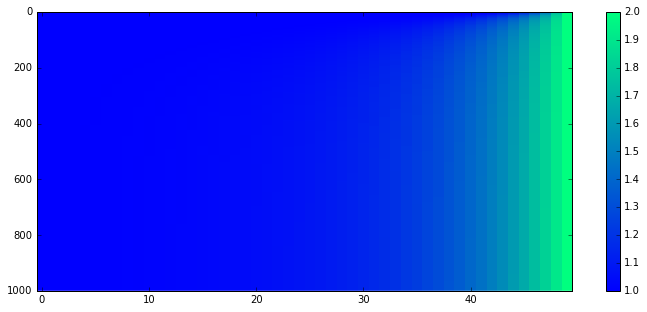

In [103]:
imshow(T, aspect='auto', cmap='winter', interpolation='none')
colorbar()

## Package into a single function

In [34]:
def show_solution(Nt, Nx, dt, dx, v, D, T_left, T_right):
    # Initialize grid
    T = np.zeros( (Nt, Nx) )  # Each time interval is will be operated on twice
    T[0,:-1] = T_left  # at t=0
    T[:,0] = T_left
    T[:,-1] = T_right  # all time
    
    # Iterate over time steps
    for t in range(1, Nt):
        # advection step
        T[t][1:-1] = advect(T[t-1], v, dx, dt)
        # diffusion step
        T[t][1:-1] = diffuse(T[t], D, dx, dt)
    imshow(T, aspect='auto', cmap='winter', interpolation='none')
    colorbar()
    return T

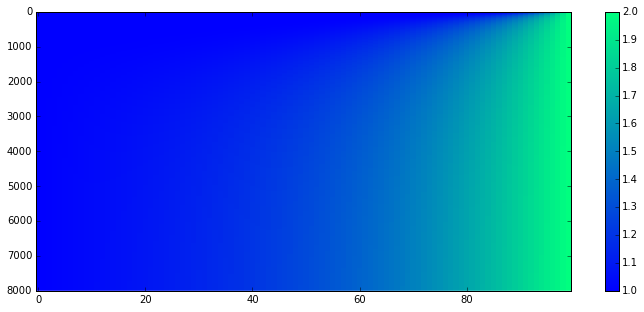

In [63]:
T_nd = show_solution(Nt=8000, Nx=100, dt=0.1, dx=1, v=0.1, D=0.5, T_left=1, T_right=2);

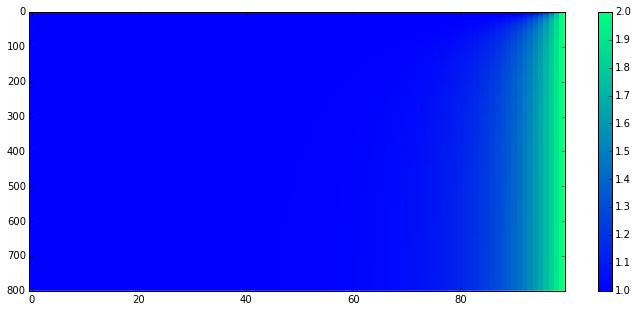

In [64]:
T = show_solution(Nt=800, Nx=100, dt=1, dx=1, v=0.1, D=0.5, T_left=1, T_right=2);

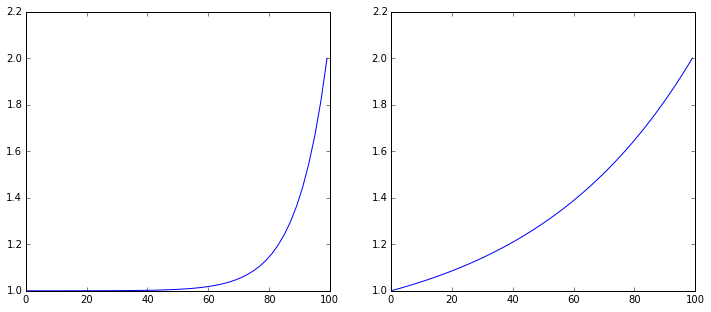

In [68]:
subplot(121)
plot(T[-1,:])
subplot(122)
plot(T_nd[-1,:])

In [82]:
def steady_state(Tl, Tr, D, v, x):
    return Tl + np.exp(-v/D*100) * (-1 + (Tr-Tl) * np.exp(v/D*x))

In [83]:
X = np.linspace(0,100,100)
T_ss = steady_state(1,2,0.5,0.1,X)

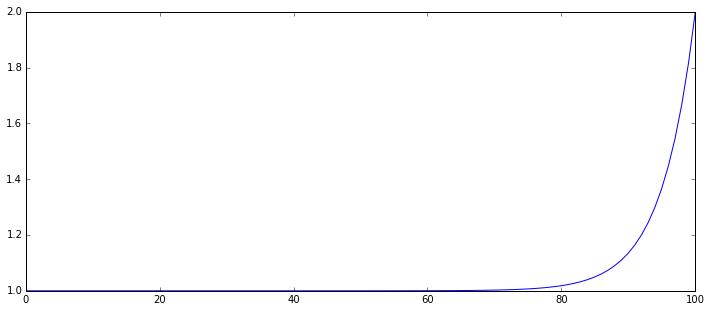

In [84]:
plot(X,T_ss)

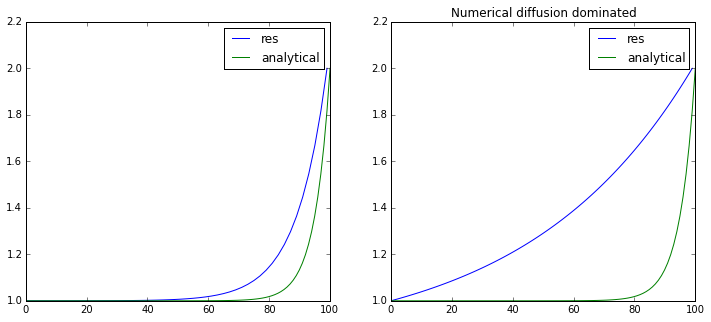

In [86]:
# plot model vs results
subplot(121)
plot(T[-1,:], label='res')
plot(X, T_ss, label='analytical')
legend()
subplot(122)
plot(T_nd[-1,:], label='res')
plot(X, T_ss, label='analytical')
title('Numerical diffusion dominated')
legend()

## Make real diffusion dominate